# Exploratory Data analysis

*On Grocery Retail Dataset*

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Dataset.csv")

In [10]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## Exploring the Details about dataset

In [11]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


➡️KEY TAKEAWAYS : 

1)Average sale  is of Rs 1496.6

2)Minimum of 10% discount is given

3)Profit making business 

In [12]:
df['City'].unique().shape

(24,)

➡️People from 24 different cities order from here

In [13]:
df['State'].unique()

array(['Tamil Nadu'], dtype=object)

➡️This is a Tamil Nadu based store i.e all customers are from Tamil Nadu only

<AxesSubplot:>

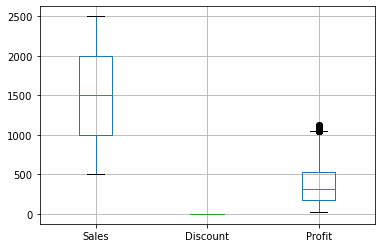

In [14]:
df.boxplot()

➡️Profit colums have some outliers

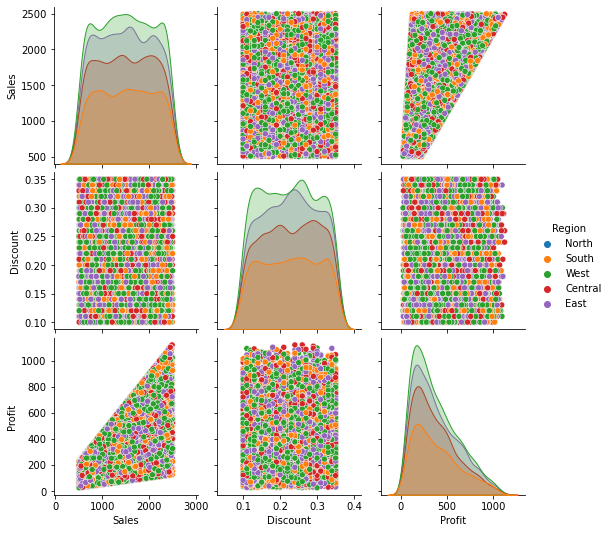

In [15]:
sns.pairplot(data = df, hue = "Region")
plt.show()

## Category wise sales

In [16]:
category_sales = df.groupby(['Category'])['Sales'].sum()
category_sales.sort_values(ascending=False)

Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64

Text(0.5, 1.0, 'Total Sales by Category')

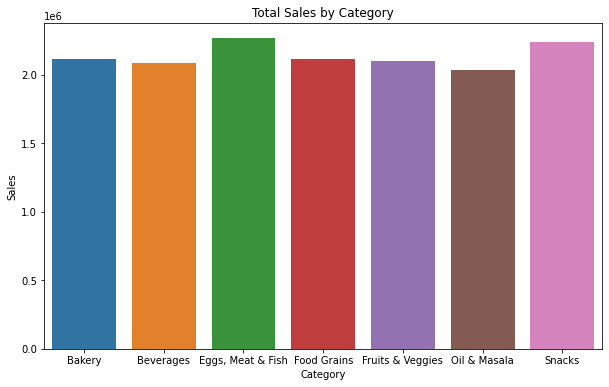

In [17]:
plt.figure(figsize=(10, 6))

sns.barplot(x=category_sales.index, y=category_sales.values)

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Category')

### ➡️Eggs, Meat and Fish have the most sales followed by snacks

## Category wise profit

In [18]:
category_profit = df.groupby(['Category'])['Profit'].sum()
category_profit.sort_values(ascending=False)

Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Food Grains          529162.64
Bakery               528521.06
Beverages            525605.76
Oil & Masala         497895.29
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Total Profit by Category')

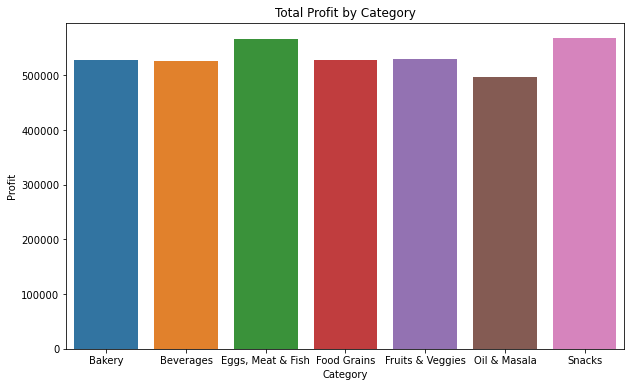

In [19]:
plt.figure(figsize=(10, 6))  #

sns.barplot(x=category_profit.index, y=category_profit.values)

plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Total Profit by Category')

### ➡️Snacks has the most profit followed by Eggs , Meat and Fish which have kinf of similar profit

-

In [20]:
snacks_df = df[df['Category'] == 'Snacks']

# Getting all the unique subcategories 
sub_categories = snacks_df['Sub Category'].unique()

print(sub_categories)

['Chocolates' 'Cookies' 'Noodles']


### ➡️There are 3 different types of snacks

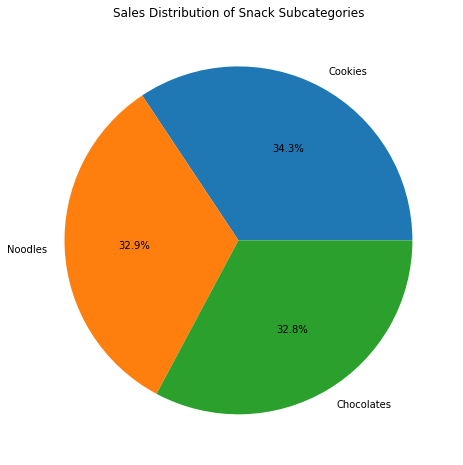

In [21]:
subcategory_sales = snacks_df.groupby('Sub Category')['Sales'].sum().reset_index()

subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=False)

subcategory_sales = subcategory_sales.reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subcategory_sales['Sales'], labels=subcategory_sales['Sub Category'], autopct='%1.1f%%')
plt.title('Sales Distribution of Snack Subcategories')

plt.show()

### ➡️Cookies sales are most among snacks

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
X = df[['Discount', 'Sub Category']]
y = df['Sales']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Perform one-hot encoding on the categorical variable
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Step 4: Choose a regression model
model = LinearRegression()

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Step 7: Make predictions
new_data = pd.DataFrame({'Discount': [0.2], 'Sub Category': ['Noodles']})
new_data_encoded = ct.transform(new_data)
predicted_sales = model.predict(new_data_encoded)
print("Predicted Sales:", predicted_sales)


Mean Squared Error: 332033.775906289
R-squared: -0.0067224307063351585
Predicted Sales: [1502.02585669]


As the Mean Squared Error and R squared suggest the model is pooerly fit and hence will make bad predictions